In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')

In [3]:
X_train = df_train.drop('Crop', axis=1)
y_train = df_train['Crop']

X_test = df_test.drop('Crop', axis=1)
y_test = df_test['Crop']

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_gscv.fit(X_train_scaled, y_train)

print(f'Best parameter: {knn_gscv.best_params_}')

Best parameter: {'n_neighbors': 3}


In [6]:
knn = KNeighborsClassifier(n_neighbors=3)

cross_val_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [0.96440129 0.97402597 0.97727273 0.97077922 0.97077922]
Mean Cross-Validation Score: 0.971451687471105


In [7]:
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9766839378238342
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.87      0.91      0.89        22
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        18
           8       0.94      1.00      0.97        16
           9       0.96      1.00      0.98        24
          10       0.76      0.93      0.84        14
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        16
          13       1.00      0.88      0.93        16
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        19
          17       1.00      1.00      1.00        20
          18       1.00      0.86      0.93        2

In [8]:
cv_scores = cross_val_score(knn, np.vstack((X_train_scaled, X_test_scaled)), np.hstack((y_train, y_test)), cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.97409326 0.98445596 0.98181818 0.96623377 0.98181818]
Mean cross-validation score: 0.9776838705336115


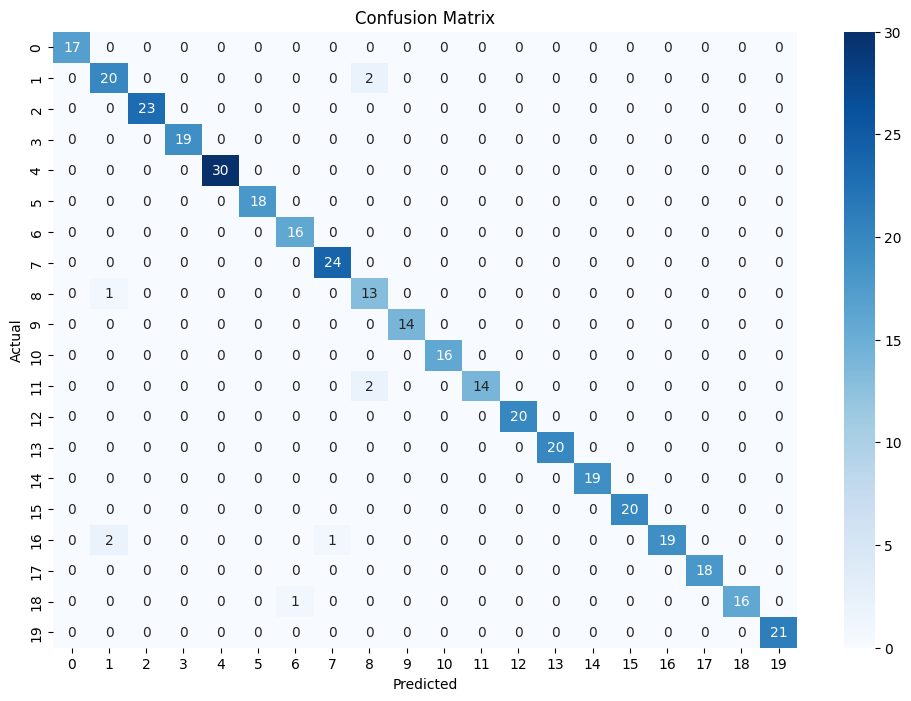

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

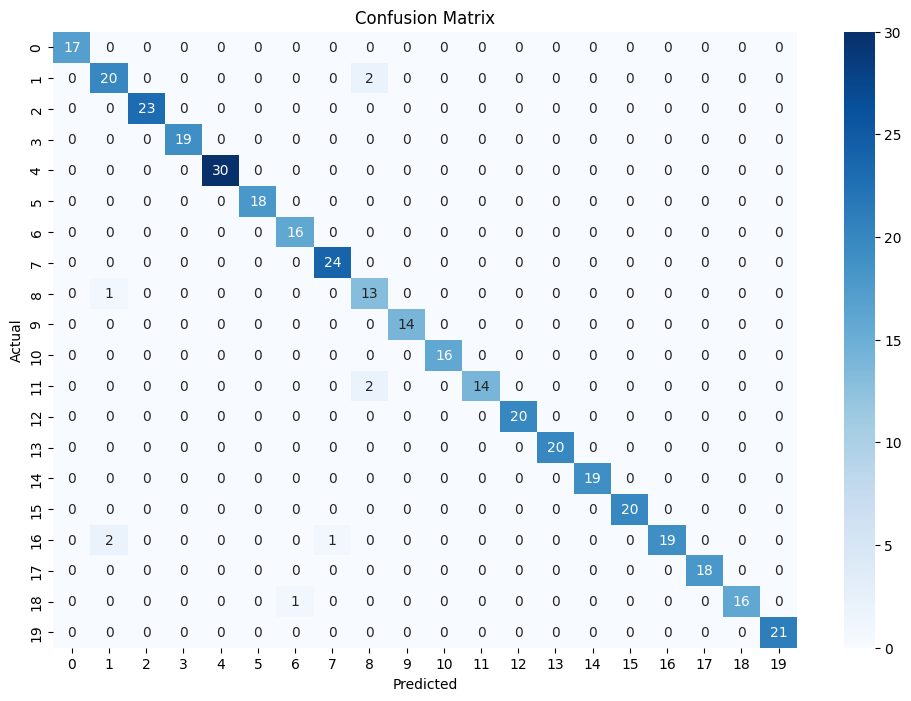

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()